## Graph Partitioning , Link Prediction and Most Influential Node Analysis on Twitter Network
#### SNA Project



#### Members
- Bokkisam Charansai - AM.EN.U4CSE19314
- Musunuru Varun - AM.EN.U4CSE19336
- Ashwin R - AM.EN.U4CSE19343
- Vasantha Gopikrishna - AM.EN.U4CSE19359

In [2]:
!wget https://raw.githubusercontent.com/charansai123/SNA/main/Twitter%20-%20Analysis/graph.csv

--2022-06-04 23:58:27--  https://raw.githubusercontent.com/charansai123/SNA/main/Twitter%20-%20Analysis/graph.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6286011 (6.0M) [text/plain]
Saving to: ‘graph.csv’

graph.csv           100%[===================>]   5.99M  --.-KB/s    in 0.08s   

2022-06-04 23:58:27 (76.4 MB/s) - ‘graph.csv’ saved [6286011/6286011]



In [3]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=f6be928c221e5246f8f8c25557a760b1ab54e7414db3f19faa7cbcf84cc8e61e
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis


In [4]:
from pyvis.network import Network
import networkx as nx
import community
import pandas as pd
import numpy

In [10]:
twi_data = pd.read_csv("graph.csv")
twi_data

,Source,Target
0,1070010671918665728,2329921
1,1070010671918665728,382134761
2,1070010671918665728,814015332
3,1070010671918665728,934041262608584704
4,1070010671918665728,304928205
...,...,...
272004,895773623570636800,837635778117259264
272005,895773623570636800,1186648442
272006,895773623570636800,1066288106
272007,895773623570636800,2789457827


In [11]:
twi_data=twi_data.sample(frac=0.0037, replace=False, random_state=1)
twi_data

,Source,Target
184476,2701384105,4217153597
239908,831966756277153793,14131652
40283,18026546,490512649
76593,1154392441346240513,2414056867
199207,1008153102,188204899
...,...,...
97502,2932027868,1315396027
186606,1054502754494939137,531122860
20339,257111136,2679687798
217168,628230869,2329921


Generation of visual network graph with pyvis

In [12]:
twi_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
twi_net.barnes_hut()
sources = twi_data['Source']
targets = twi_data['Target']

edge_data = zip(sources, targets)

for e in edge_data:
    src = e[0]
    dst = e[1]

    twi_net.add_node(src, src, title=str(src))
    twi_net.add_node(dst, dst, title=str(dst))
    twi_net.add_edge(src,dst,value=1)


neighbour_map = twi_net.get_adj_list()
twi_net.nodes

[{'font': {'color': 'white'},
  'id': 2701384105,
  'label': 2701384105,
  'shape': 'dot',
  'title': '2701384105'},
 {'font': {'color': 'white'},
  'id': 4217153597,
  'label': 4217153597,
  'shape': 'dot',
  'title': '4217153597'},
 {'font': {'color': 'white'},
  'id': 831966756277153793,
  'label': 831966756277153793,
  'shape': 'dot',
  'title': '831966756277153793'},
 {'font': {'color': 'white'},
  'id': 14131652,
  'label': 14131652,
  'shape': 'dot',
  'title': '14131652'},
 {'font': {'color': 'white'},
  'id': 18026546,
  'label': 18026546,
  'shape': 'dot',
  'title': '18026546'},
 {'font': {'color': 'white'},
  'id': 490512649,
  'label': 490512649,
  'shape': 'dot',
  'title': '490512649'},
 {'font': {'color': 'white'},
  'id': 1154392441346240513,
  'label': 1154392441346240513,
  'shape': 'dot',
  'title': '1154392441346240513'},
 {'font': {'color': 'white'},
  'id': 2414056867,
  'label': 2414056867,
  'shape': 'dot',
  'title': '2414056867'},
 {'font': {'color': 'white'}

In [13]:
# add neighbor data to node hover data
from IPython.core.display import display, HTML

for node in twi_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(str(neighbour_map[node['id']]))
    node['value'] = len(neighbour_map[node['id']])

twi_net.show('twi.html')

In [14]:
G=[]
for ind in twi_data.index:
  k=(twi_data['Source'][ind],twi_data['Target'][ind])
  G.append(k)
G[150:300]

[(315293016, 56341402),
 (29692085, 1546977270),
 (112440496, 1477833530),
 (18873795, 218608897),
 (755302406, 15008596),
 (441778701, 1179646258769584128),
 (1216521482, 971865222318346240),
 (3042264274, 63511763),
 (937390732922490880, 490512649),
 (4690350990, 427295058),
 (807564604054368256, 1105508110213545984),
 (1923380198, 879170334578139140),
 (1057191776119795712, 887665294570815488),
 (4692076176, 8143682),
 (313744999, 473353790),
 (359838444, 109533154),
 (541812990, 270614452),
 (854413000350072836, 490363356),
 (34897314, 847699856651042816),
 (192679212, 2447130548),
 (300589072, 997914914147721216),
 (21719973, 62883520),
 (997914914147721216, 2427351685),
 (1009818953613479936, 864374964),
 (24016742, 821654937851613186),
 (875383045, 1672868695),
 (636192524, 902619844603994113),
 (1244399556, 500364862),
 (337183206, 1418434280),
 (226713274, 1105508110213545984),
 (605956105, 810463792568090624),
 (1834931742, 269873297),
 (737641519264501760, 2766227690),
 (254

In [15]:
g=nx.Graph(G)

In [16]:
g.number_of_nodes()

1337

In [17]:
g.number_of_edges()

1006

In [18]:
nx.degree_histogram(g)

[0, 963, 222, 85, 31, 21, 6, 3, 2, 0, 0, 2, 1, 0, 1]

Degree centrality

In [19]:
dic=nx.degree_centrality(g)
Keymax = max(zip(dic.values(), dic.keys()))[1]
print("Node with maximum degree centrality:",Keymax)
print("Max degree centrality:",dic[Keymax])
dic

Node with maximum degree centrality: 56341402
Max degree centrality: 0.010479041916167666


{2701384105: 0.0022455089820359285,
 4217153597: 0.0007485029940119761,
 831966756277153793: 0.0007485029940119761,
 14131652: 0.0007485029940119761,
 18026546: 0.0007485029940119761,
 490512649: 0.0022455089820359285,
 1154392441346240513: 0.0014970059880239522,
 2414056867: 0.0014970059880239522,
 1008153102: 0.0007485029940119761,
 188204899: 0.0007485029940119761,
 355654498: 0.0022455089820359285,
 1540384460: 0.0022455089820359285,
 3001054244: 0.0007485029940119761,
 2284174986: 0.0022455089820359285,
 284120528: 0.0007485029940119761,
 7559192: 0.0007485029940119761,
 764121685905866752: 0.0014970059880239522,
 373682248: 0.0022455089820359285,
 1973058649: 0.0014970059880239522,
 165254467: 0.0007485029940119761,
 3308159633: 0.0007485029940119761,
 2335431: 0.0022455089820359285,
 3200670107: 0.0007485029940119761,
 258847118: 0.0037425149700598802,
 700746896680161280: 0.0007485029940119761,
 3883357954: 0.0007485029940119761,
 799974644803629056: 0.0014970059880239522,
 757

Betweenness centrality

In [20]:
dic=nx.betweenness_centrality(g, normalized=True, endpoints=False)
Keymax = max(zip(dic.values(), dic.keys()))[1]
print("Node with maximum betweenness centrality:",Keymax)
print("Max betweenness centrality:",dic[Keymax])
dic

Node with maximum betweenness centrality: 29692085
Max betweenness centrality: 0.008731974253739712


{2701384105: 0.0003711677768059387,
 4217153597: 0.0,
 831966756277153793: 0.0,
 14131652: 0.0,
 18026546: 0.0,
 490512649: 0.0005539482832088632,
 1154392441346240513: 1.34562336002153e-05,
 2414056867: 7.849469600125593e-06,
 1008153102: 0.0,
 188204899: 0.0,
 355654498: 7.849469600125593e-06,
 1540384460: 7.849469600125593e-06,
 3001054244: 0.0,
 2284174986: 1.4577586400233241e-05,
 284120528: 0.0,
 7559192: 0.0,
 764121685905866752: 0.00017380968400278096,
 373682248: 0.00010092175200161475,
 1973058649: 1.1213528000179417e-06,
 165254467: 0.0,
 3308159633: 0.0,
 2335431: 0.0001558680392024939,
 3200670107: 0.0,
 258847118: 4.709681760075355e-05,
 700746896680161280: 0.0,
 3883357954: 0.0,
 799974644803629056: 0.00018614456480297832,
 757931125314510849: 0.0,
 577195836: 0.0010675278656170806,
 255048621: 0.0023212002960371395,
 830442736402653185: 0.00037789589360604636,
 1923380198: 0.00015474668640247597,
 272761249: 0.0,
 317422543: 1.9062997600305008e-05,
 53913642: 0.0,
 2329

Closeness centrality

In [21]:
dic=nx.closeness_centrality(g)
Keymax = max(zip(dic.values(), dic.keys()))[1]
print("Node with maximum closeness centrality:",Keymax)
print("Max closeness centrality:",dic[Keymax])
dic

Node with maximum closeness centrality: 29692085
Max closeness centrality: 0.021973684210526315


{2701384105: 0.011151175213675214,
 4217153597: 0.01024288518155054,
 831966756277153793: 0.0007485029940119761,
 14131652: 0.0007485029940119761,
 18026546: 0.012229056824838899,
 490512649: 0.01354639844256976,
 1154392441346240513: 0.0026613439787092482,
 2414056867: 0.002082790939859412,
 1008153102: 0.0007485029940119761,
 188204899: 0.0007485029940119761,
 355654498: 0.0026732249786142,
 1540384460: 0.0026732249786142,
 3001054244: 0.0023952095808383238,
 2284174986: 0.003684937816674344,
 284120528: 0.0007485029940119761,
 7559192: 0.0007485029940119761,
 764121685905866752: 0.00681046567217392,
 373682248: 0.006221179396460478,
 1973058649: 0.0014970059880239522,
 165254467: 0.000998003992015968,
 3308159633: 0.008329367754557112,
 2335431: 0.009851706508653711,
 3200670107: 0.0029417908369307895,
 258847118: 0.004080548580258837,
 700746896680161280: 0.0007485029940119761,
 3883357954: 0.0007485029940119761,
 799974644803629056: 0.013046875,
 757931125314510849: 0.011820498301

Eigenvector centrality

In [22]:
dic=nx.eigenvector_centrality(g)
Keymax = max(zip(dic.values(), dic.keys()))[1]
print("Node with maximum eigenvector centrality:",Keymax)
print("Max eigenvector centrality:",dic[Keymax])
dic

Node with maximum eigenvector centrality: 56341402
Max eigenvector centrality: 0.689430038857041


{2701384105: 2.5633718508458426e-05,
 4217153597: 7.287074445500943e-06,
 831966756277153793: 8.542514720837546e-37,
 14131652: 8.542514720837546e-37,
 18026546: 1.0600255515632774e-06,
 490512649: 3.7188273182846938e-06,
 1154392441346240513: 5.96700239016892e-19,
 2414056867: 3.64173848807571e-19,
 1008153102: 8.542514720837546e-37,
 188204899: 8.542514720837546e-37,
 355654498: 2.7102638014570944e-20,
 1540384460: 2.7102638014570944e-20,
 3001054244: 3.963654732132629e-14,
 2284174986: 1.0066036363103353e-13,
 284120528: 8.542514720837546e-37,
 7559192: 8.542514720837546e-37,
 764121685905866752: 4.1844059710752145e-09,
 373682248: 2.2525850504893444e-09,
 1973058649: 4.1274380660497283e-29,
 165254467: 2.918539445431252e-29,
 3308159633: 0.054955383519761654,
 2335431: 0.20959026827212873,
 3200670107: 1.2999578406242403e-14,
 258847118: 3.221163411263708e-14,
 700746896680161280: 8.542514720837546e-37,
 3883357954: 8.542514720837546e-37,
 799974644803629056: 4.6727112646391617e-07

**Communities Detection**

Girvan Newman

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

In [24]:
communities = girvan_newman(g)


In [25]:
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)
print(len(node_groups))

[[1080431555565285376, 1019605193523113985, 1223932829492547585, 1094616925647327235, 872266923869917188, 1180906436253175808, 1165252919328985094, 2693663232, 1111238619002531840, 890863214690480129, 749225951909842945, 807665496933990402, 854413000350072836, 594492962, 229910053, 159565864, 35908657, 18026546, 40686645, 547871798, 226571318, 4217153597, 2240131645, 88499773, 2780506176, 1479301693, 121110083, 174809159, 14817871, 21773404, 15677536, 579299426, 177173603, 235957352, 68056693, 164190842, 398398588, 19114108, 951765794156957696, 937390732922490880, 1009158503901138944, 175473813, 2902126231, 1938981038, 29692085, 467551928, 559633081, 487381183, 15526602, 16403155, 632724692, 3121503958, 100940503, 212382437, 436233965, 384811761, 8517882, 977133822, 914061558254329856, 1960705284, 1034734556824395777, 38833417, 490512649, 182398226, 2277181716, 13256982, 2260576540, 2786173214, 2412334885, 39281968, 820092720, 1316984629, 74949430, 11914552, 363747144, 36160345, 197833

103
2
9
2
6


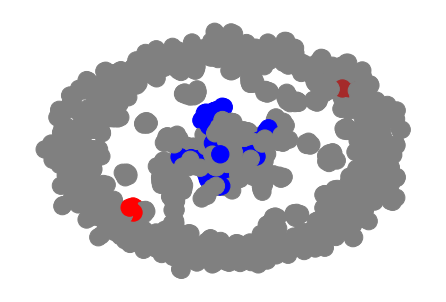

In [26]:
color_map = []
for node in g:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]: 
        color_map.append('green')
    elif node in node_groups[2]:
        color_map.append('red')
    elif node in node_groups[3]:
        color_map.append('yellow')
    elif node in node_groups[4]:
        color_map.append('brown')
    else:
      color_map.append('grey')

print(len(node_groups[0]))
print(len(node_groups[1]))
print(len(node_groups[2]))
print(len(node_groups[3]))
print(len(node_groups[4]))
nx.draw(g, node_color=color_map)
plt.show()

*Kernighan–Lin* algorithm


In [27]:
from networkx.algorithms import community

In [28]:
ker_lin_community=community.kernighan_lin_bisection(g, partition=None, max_iter=10, weight='weight', seed=None)
list(ker_lin_community)

[{743913,
  821962,
  1190041,
  1246421,
  2893971,
  5811092,
  6334772,
  7559192,
  7685632,
  8517882,
  9700072,
  11094912,
  11914552,
  12090952,
  12169762,
  12402812,
  12685362,
  13256982,
  14066472,
  14112036,
  14308267,
  14470738,
  14519511,
  14538236,
  14556945,
  14810361,
  14835654,
  15160540,
  15526602,
  15533871,
  15570920,
  15937756,
  16174436,
  16264965,
  16289312,
  16597102,
  16621479,
  16795018,
  17083959,
  17601379,
  17867838,
  18026546,
  18050575,
  18099967,
  18163032,
  18204430,
  18427094,
  18805477,
  18907427,
  19114108,
  19202628,
  19210200,
  19402238,
  19569549,
  19816992,
  20023987,
  20131383,
  20610029,
  21305051,
  21332732,
  21674887,
  21719973,
  22385548,
  22671862,
  22979111,
  23861430,
  24016742,
  24669093,
  26730180,
  26832834,
  27297648,
  27403471,
  27439013,
  27700085,
  28718742,
  29356679,
  29692085,
  31413346,
  32386320,
  33383238,
  33555058,
  34339576,
  34653414,
  34897314,
  363

In [42]:
print(len(ker_lin_community))
print(len(list(ker_lin_community)))
k=list(ker_lin_community)
print(len(k[0]))
print(len(k[1]))

2
2
668
669


**Clauset-Newman-Moore greedy modularity maximization**

In [30]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(g)
print(len(c))
print(len(c[0]))
c[:3]

340
46


[frozenset({8517882,
            15677536,
            29692085,
            40686645,
            43363760,
            68056693,
            74949430,
            77712285,
            81737577,
            88499773,
            109258239,
            114881969,
            156259271,
            164190842,
            174809159,
            175473813,
            177173603,
            235957352,
            399544729,
            487381183,
            490363356,
            559633081,
            632724692,
            977133822,
            1316984629,
            1510919082,
            1546977270,
            1855503205,
            1960705284,
            1975097718,
            2240131645,
            2253056460,
            2260576540,
            2405048743,
            2492740016,
            2780506176,
            2786173214,
            3386954115,
            749225951909842945,
            807665496933990402,
            854413000350072836,
            890863214690480

**Louvain Community Detection**

In [31]:
from community import community_louvain
c = community_louvain.best_partition(g)
c

{2701384105: 0,
 4217153597: 0,
 831966756277153793: 1,
 14131652: 1,
 18026546: 2,
 490512649: 2,
 1154392441346240513: 3,
 2414056867: 3,
 1008153102: 4,
 188204899: 4,
 355654498: 5,
 1540384460: 5,
 3001054244: 6,
 2284174986: 6,
 284120528: 7,
 7559192: 7,
 764121685905866752: 90,
 373682248: 90,
 1973058649: 9,
 165254467: 9,
 3308159633: 10,
 2335431: 10,
 3200670107: 11,
 258847118: 11,
 700746896680161280: 12,
 3883357954: 12,
 799974644803629056: 13,
 757931125314510849: 13,
 577195836: 14,
 255048621: 14,
 830442736402653185: 15,
 1923380198: 15,
 272761249: 16,
 317422543: 16,
 53913642: 17,
 2329657867: 17,
 14543336: 18,
 486530534: 18,
 471996981: 19,
 15008596: 19,
 954335153723183104: 14,
 931967049789792257: 14,
 3097030567: 21,
 1611332490: 21,
 718799493160964096: 22,
 797108811186262017: 22,
 2603978460: 14,
 910168235261218816: 23,
 1069045039: 23,
 30683863: 24,
 1689700388: 24,
 737362108397060096: 25,
 258030141: 25,
 104629239: 26,
 12402812: 26,
 407624682: 2

**Link Prediction**

In [5]:
twi_data = pd.read_csv("graph.csv")
twi_data

,Source,Target
0,1070010671918665728,2329921
1,1070010671918665728,382134761
2,1070010671918665728,814015332
3,1070010671918665728,934041262608584704
4,1070010671918665728,304928205
...,...,...
272004,895773623570636800,837635778117259264
272005,895773623570636800,1186648442
272006,895773623570636800,1066288106
272007,895773623570636800,2789457827


In [6]:
G=[]
for ind in twi_data.index:
  k=(twi_data['Source'][ind],twi_data['Target'][ind])
  G.append(k)
G[150:300]

[(848539500167004160, 2338824692),
 (848539500167004160, 365002580),
 (848539500167004160, 816646064493170688),
 (848539500167004160, 323439357),
 (848539500167004160, 579143740),
 (848539500167004160, 347886653),
 (848539500167004160, 15160540),
 (848539500167004160, 160925047),
 (848539500167004160, 34249543),
 (848539500167004160, 582233920),
 (848539500167004160, 839011723),
 (848539500167004160, 301579658),
 (848539500167004160, 26419626),
 (848539500167004160, 782795711989420033),
 (848539500167004160, 4515151),
 (848539500167004160, 11778512),
 (848539500167004160, 318262821),
 (848539500167004160, 935785016155570177),
 (848539500167004160, 793717106256773120),
 (848539500167004160, 4690350990),
 (848539500167004160, 712963903),
 (848539500167004160, 103370610),
 (848539500167004160, 490512649),
 (848539500167004160, 800351666),
 (848539500167004160, 352013269),
 (848539500167004160, 973642770521915394),
 (848539500167004160, 958887670477975552),
 (848539500167004160, 17354555),

In [7]:
g=nx.Graph(G)

In [8]:
g.number_of_nodes()

6757

In [10]:
g.number_of_edges()

219977

**Resource Allocation Index**

In [19]:
preds = nx.resource_allocation_index(g)
cnt=0
m=0
for u, v, p in preds:
    if p>m:
      m=p
      pair=(u,v)
    print(f"({u}, {v}) -> {p:.8f}")
    cnt=cnt+1
    if cnt==100000:
      break
print(f"Max value : {pair} -> {m:.8f}")

Streaming output truncated to the last 5000 lines.
(884741, 47650635) -> 0.00256652
(884741, 2847233865) -> 0.00386100
(884741, 49551182) -> 0.00159236
(884741, 149706579) -> 0.00317029
(884741, 2742114133) -> 0.00032938
(884741, 874075994) -> 0.01219183
(884741, 2805421915) -> 0.04590707
(884741, 3000719200) -> 0.00925926
(884741, 2459490150) -> 0.00128449
(884741, 36476777) -> 0.00332948
(884741, 1248843625) -> 0.00032938
(884741, 3141015404) -> 0.00132275
(884741, 12277612) -> 0.00128449
(884741, 440244080) -> 0.00000000
(884741, 882808693) -> 0.00488590
(884741, 314464118) -> 0.01222930
(884741, 808824) -> 0.01470588
(884741, 2374457209) -> 0.00192174
(884741, 1423906682) -> 0.02333360
(884741, 3164788608) -> 0.00000000
(884741, 1856509825) -> 0.05583981
(884741, 1140133408229617664) -> 0.00032938
(884741, 1114259648326987776) -> 0.00032938
(884741, 907399884742914048) -> 0.00123457
(884741, 1125449088839774208) -> 0.00032938
(884741, 1014022182194704384) -> 0.00000000
(884741, 545

**Jaccard Coefficient**

In [20]:
preds = nx.jaccard_coefficient(g)
cnt=0
m=0
for u, v, p in preds:
    if p>m:
      m=p
      pair=(u,v)
    print(f"({u}, {v}) -> {p:.8f}")
    cnt=cnt+1
    if cnt==100000:
      break
print(f"Max value : {pair} -> {m:.8f}")

Streaming output truncated to the last 5000 lines.
(884741, 47650635) -> 0.03030303
(884741, 2847233865) -> 0.01612903
(884741, 49551182) -> 0.01250000
(884741, 149706579) -> 0.02409639
(884741, 2742114133) -> 0.00564972
(884741, 874075994) -> 0.01834862
(884741, 2805421915) -> 0.01260504
(884741, 3000719200) -> 0.01162791
(884741, 2459490150) -> 0.00854701
(884741, 36476777) -> 0.02127660
(884741, 1248843625) -> 0.01000000
(884741, 3141015404) -> 0.01612903
(884741, 12277612) -> 0.01438849
(884741, 440244080) -> 0.00000000
(884741, 882808693) -> 0.02352941
(884741, 314464118) -> 0.03636364
(884741, 808824) -> 0.01449275
(884741, 2374457209) -> 0.02272727
(884741, 1423906682) -> 0.01931330
(884741, 3164788608) -> 0.00000000
(884741, 1856509825) -> 0.05384615
(884741, 1140133408229617664) -> 0.01694915
(884741, 1114259648326987776) -> 0.01694915
(884741, 907399884742914048) -> 0.01408451
(884741, 1125449088839774208) -> 0.01010101
(884741, 1014022182194704384) -> 0.00000000
(884741, 545

**Adamic–Adar index**


In [22]:
preds = nx.adamic_adar_index(g)
cnt=0
m=0
for u, v, p in preds:
    if p>m:
      m=p
      pair=(u,v)
    print(f"({u}, {v}) -> {p:.8f}")
    cnt=cnt+1
    if cnt==100000:
      break
print(f"Max value : {pair} -> {m:.8f}")

Streaming output truncated to the last 5000 lines.
(884741, 47650635) -> 0.28858047
(884741, 2847233865) -> 0.17995878
(884741, 49551182) -> 0.15521828
(884741, 149706579) -> 0.29525756
(884741, 2742114133) -> 0.12471478
(884741, 874075994) -> 0.38993450
(884741, 2805421915) -> 1.60787118
(884741, 3000719200) -> 0.35764455
(884741, 2459490150) -> 0.26852343
(884741, 36476777) -> 0.43001269
(884741, 1248843625) -> 0.12471478
(884741, 3141015404) -> 0.15087413
(884741, 12277612) -> 0.26852343
(884741, 440244080) -> 0.00000000
(884741, 882808693) -> 0.33203204
(884741, 314464118) -> 0.64816198
(884741, 808824) -> 0.23699447
(884741, 2374457209) -> 0.27993305
(884741, 1423906682) -> 1.45540309
(884741, 3164788608) -> 0.00000000
(884741, 1856509825) -> 1.39834585
(884741, 1140133408229617664) -> 0.12471478
(884741, 1114259648326987776) -> 0.12471478
(884741, 907399884742914048) -> 0.14931983
(884741, 1125449088839774208) -> 0.12471478
(884741, 1014022182194704384) -> 0.00000000
(884741, 545

**Preferential attachment**


In [23]:
preds = nx.preferential_attachment(g)
cnt=0
m=0
for u, v, p in preds:
    if p>m:
      m=p
      pair=(u,v)
    print(f"({u}, {v}) -> {p:.8f}")
    cnt=cnt+1
    if cnt==100000:
      break
print(f"Max value : {pair} -> {m:.8f}")

Streaming output truncated to the last 5000 lines.
(884741, 47650635) -> 715.00000000
(884741, 2847233865) -> 440.00000000
(884741, 49551182) -> 1430.00000000
(884741, 149706579) -> 1650.00000000
(884741, 2742114133) -> 6765.00000000
(884741, 874075994) -> 3080.00000000
(884741, 2805421915) -> 36740.00000000
(884741, 3000719200) -> 6545.00000000
(884741, 2459490150) -> 9955.00000000
(884741, 36476777) -> 4895.00000000
(884741, 1248843625) -> 2530.00000000
(884741, 3141015404) -> 440.00000000
(884741, 12277612) -> 4730.00000000
(884741, 440244080) -> 330.00000000
(884741, 882808693) -> 1760.00000000
(884741, 314464118) -> 3245.00000000
(884741, 808824) -> 825.00000000
(884741, 2374457209) -> 1925.00000000
(884741, 1423906682) -> 23100.00000000
(884741, 3164788608) -> 220.00000000
(884741, 1856509825) -> 4510.00000000
(884741, 1140133408229617664) -> 275.00000000
(884741, 1114259648326987776) -> 275.00000000
(884741, 907399884742914048) -> 935.00000000
(884741, 1125449088839774208) -> 24

**Common Neighbor and Centrality based Parameterized Algorithm(CCPA)**




In [24]:
preds = nx.common_neighbor_centrality(g)
cnt=0
m=0
for u, v, p in preds:
    if p>m:
      m=p
      pair=(u,v)
    print(f"({u}, {v}) -> {p:.8f}")
    cnt=cnt+1
    if cnt==100000:
      break
print(f"Max value : {pair} -> {m:.8f}")

Streaming output truncated to the last 5000 lines.
(884741, 47650635) -> 677.30000000
(884741, 2847233865) -> 676.50000000
(884741, 49551182) -> 676.50000000
(884741, 149706579) -> 677.30000000
(884741, 2742114133) -> 676.50000000
(884741, 874075994) -> 677.30000000
(884741, 2805421915) -> 682.90000000
(884741, 3000719200) -> 677.30000000
(884741, 2459490150) -> 677.30000000
(884741, 36476777) -> 678.10000000
(884741, 1248843625) -> 676.50000000
(884741, 3141015404) -> 676.50000000
(884741, 12277612) -> 677.30000000
(884741, 440244080) -> 450.46666667
(884741, 882808693) -> 677.30000000
(884741, 314464118) -> 678.90000000
(884741, 808824) -> 676.50000000
(884741, 2374457209) -> 677.30000000
(884741, 1423906682) -> 682.90000000
(884741, 3164788608) -> 450.46666667
(884741, 1856509825) -> 681.30000000
(884741, 1140133408229617664) -> 676.50000000
(884741, 1114259648326987776) -> 676.50000000
(884741, 907399884742914048) -> 676.50000000
(884741, 1125449088839774208) -> 676.50000000
(88474

## Page Rank 

**Most Influential Node through Page rank**

In [25]:
pgr=nx.pagerank(g)

In [26]:
pgr_max = max(pgr, key=pgr.get)
print("Maximum page rank node:",pgr_max)
print("Max page rank value:",pgr[pgr_max])

Maximum page rank node: 579299426
Max page rank value: 0.010002694145263193


**Voterank**

In [27]:
vr=nx.voterank(g)

In [28]:
print(len(vr))
vr[0:5]

3505


[56341402, 579299426, 582161546, 90258002, 229910053]